## 1. What is regularization?

- Regularization is a method of adding a penalty term to the cost function of a linear regression model, which reduces the magnitude of the coefficients or weights. 

- The penalty term can be either L1 or L2 norm, which correspond to different types of regularization: Lasso and Ridge, respectively. 

- By adding regularization, you can prevent the model from fitting too closely to the training data and reduce the variance of the model. However, regularization also introduces some bias to the model, as it shrinks the coefficients towards zero or a constant.

## 2. What is the bias-variance trade-off?

- The bias-variance trade-off is a fundamental concept in machine learning, which describes the trade-off between the error due to the model's complexity and the error due to the model's sensitivity to the data. 
- A high-bias model is one that is too simple and cannot capture the underlying patterns of the data, resulting in a large error on both the training and the test data. 
- A high-variance model is one that is too complex and fits the training data too well, resulting in a small error on the training data but a large error on the test data. 
- Ideally, you want to find a model that has low bias and low variance, which means that it can generalize well to new data.

## 3. How does regularization affect the bias-variance trade-off?

- Regularization is a way of controlling the complexity of a linear regression model, by penalizing the coefficients that are not important or relevant for the prediction. 
- By doing so, regularization can reduce the variance of the model, as it prevents overfitting and makes the model more robust to noise and outliers. 
- However, regularization also increases the bias of the model, as it forces the coefficients to be smaller or zero, which means that the model may not capture some of the true relationships between the variables. 
- Therefore, regularization involves a trade-off between bias and variance, and you need to find the optimal level of regularization that minimizes the total error of the model.

## 4. How do you choose the optimal level of regularization?

- The optimal level of regularization depends on the data and the problem you are trying to solve. 
- One way to choose the optimal level of regularization is to use cross-validation, which is a technique of splitting the data into multiple subsets and using some of them for training and some of them for validation. 
- By varying the regularization parameter, you can evaluate how well the model performs on the validation data, and choose the value that minimizes the validation error. 
- Another way to choose the optimal level of regularization is to use grid search or random search, which are methods of exploring a range of possible values for the regularization parameter and finding the best one based on a scoring metric.

## 5. How do you implement regularization in linear regression?

- There are different ways to implement regularization in linear regression, depending on the type of regularization and the programming language or tool you are using. 
- For example, if you are using Python and scikit-learn, you can use the classes LinearRegression, Lasso, or Ridge to create and fit linear regression models with or without regularization. 
- The Lasso class implements L1 regularization, which tends to select a subset of features and set the rest of the coefficients to zero. 
- The Ridge class implements L2 regularization, which tends to shrink all the coefficients towards zero but not exactly zero. You can also use the ElasticNet class, which combines both L1 and L2 regularization, and allows you to control the balance between them. 
- To specify the regularization parameter, you can use the alpha argument, which controls the strength of the penalty. A higher alpha means more regularization and more bias, while a lower alpha means less regularization and more variance.

## 6. What are the benefits and limitations of regularization in linear regression?

- Regularization in linear regression can have several benefits and limitations, depending on the data and the problem you are attempting to solve. 
- It can reduce overfitting and improve generalization, as well as simplify the model and make it more interpretable.
- Regularization can also handle multicollinearity, which is a situation where some of the explanatory variables are highly correlated with each other, by reducing the effect of redundant or irrelevant variables. 
- However, regularization can also introduce underfitting and reduce accuracy, by ignoring some of the important or relevant features or relationships in the data. 
- Additionally, it can increase bias and make the model less flexible, by constraining the coefficients to be smaller or zero. Finally, regularization can require tuning and validation, by adding an extra parameter that needs to be chosen carefully and evaluated on different data sets.

## Linear Regression and Regularization

In [1]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('fivethirtyeight')

In [15]:
data = pd.read_csv("../dataset/boston.csv", index_col=0)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Data Description

- Data :- Independent Variables also known as the x values.
- Feature_names :- The column names of the data.
- Target :- The target variable or the price of the houses(dependent variable) alse known as y value.

In [16]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
zn,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
indus,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
chas,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
nox,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
rm,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
age,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
dis,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
rad,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
tax,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


### It seems there are no missing values in data

In [20]:
# looking at null values 

data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>There are no missing values in the data.</strong></p> 

# EDA

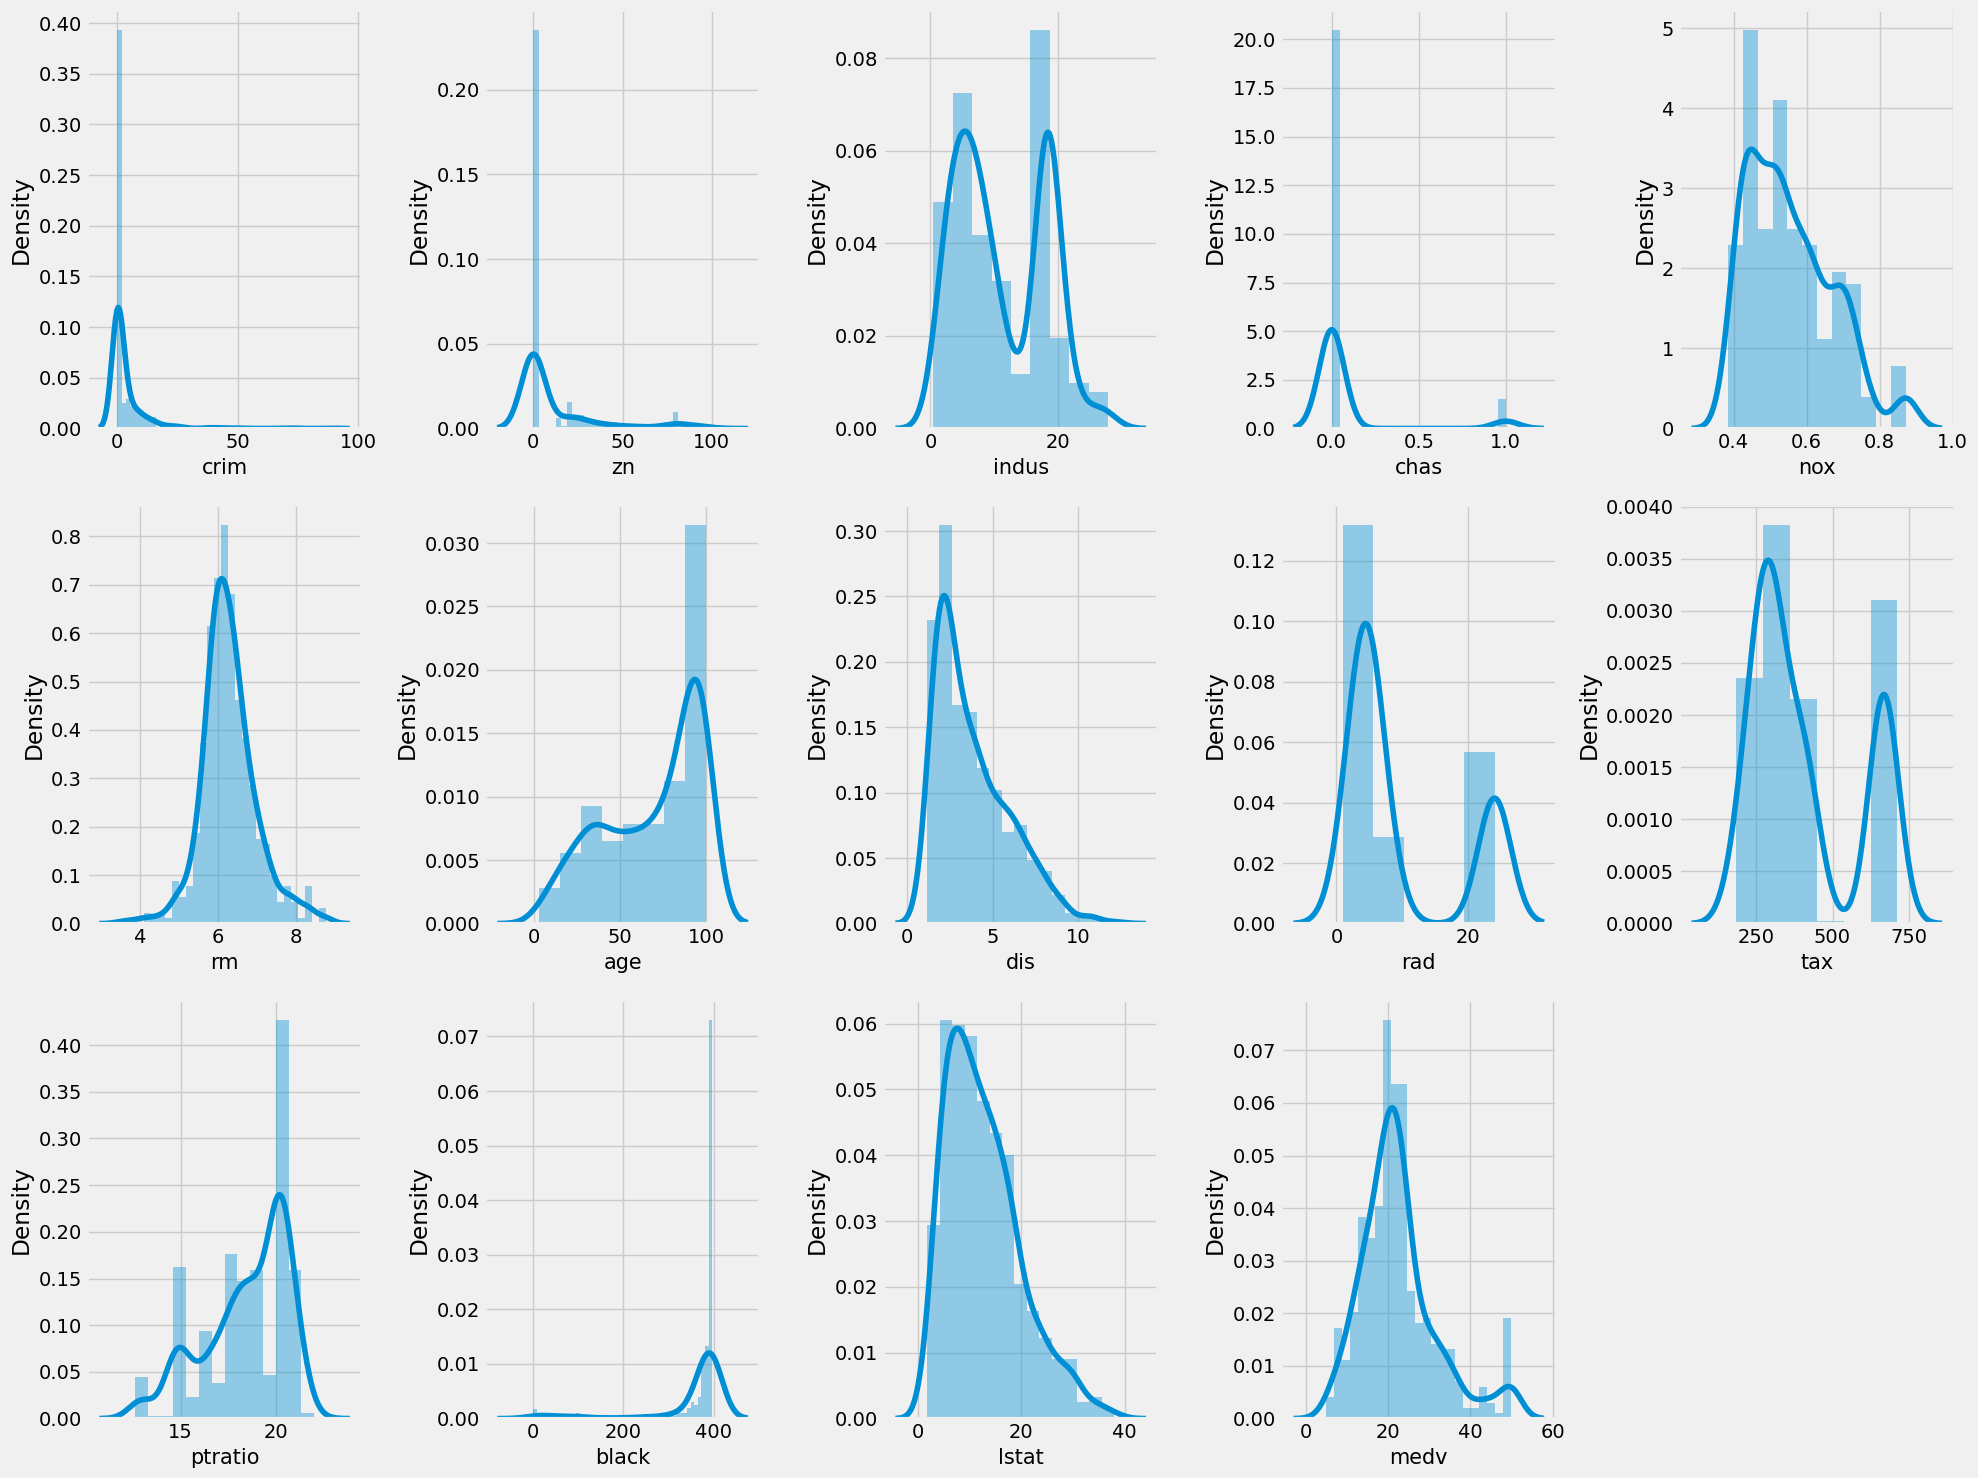

In [22]:
# Let's see how data is distributed for every column

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

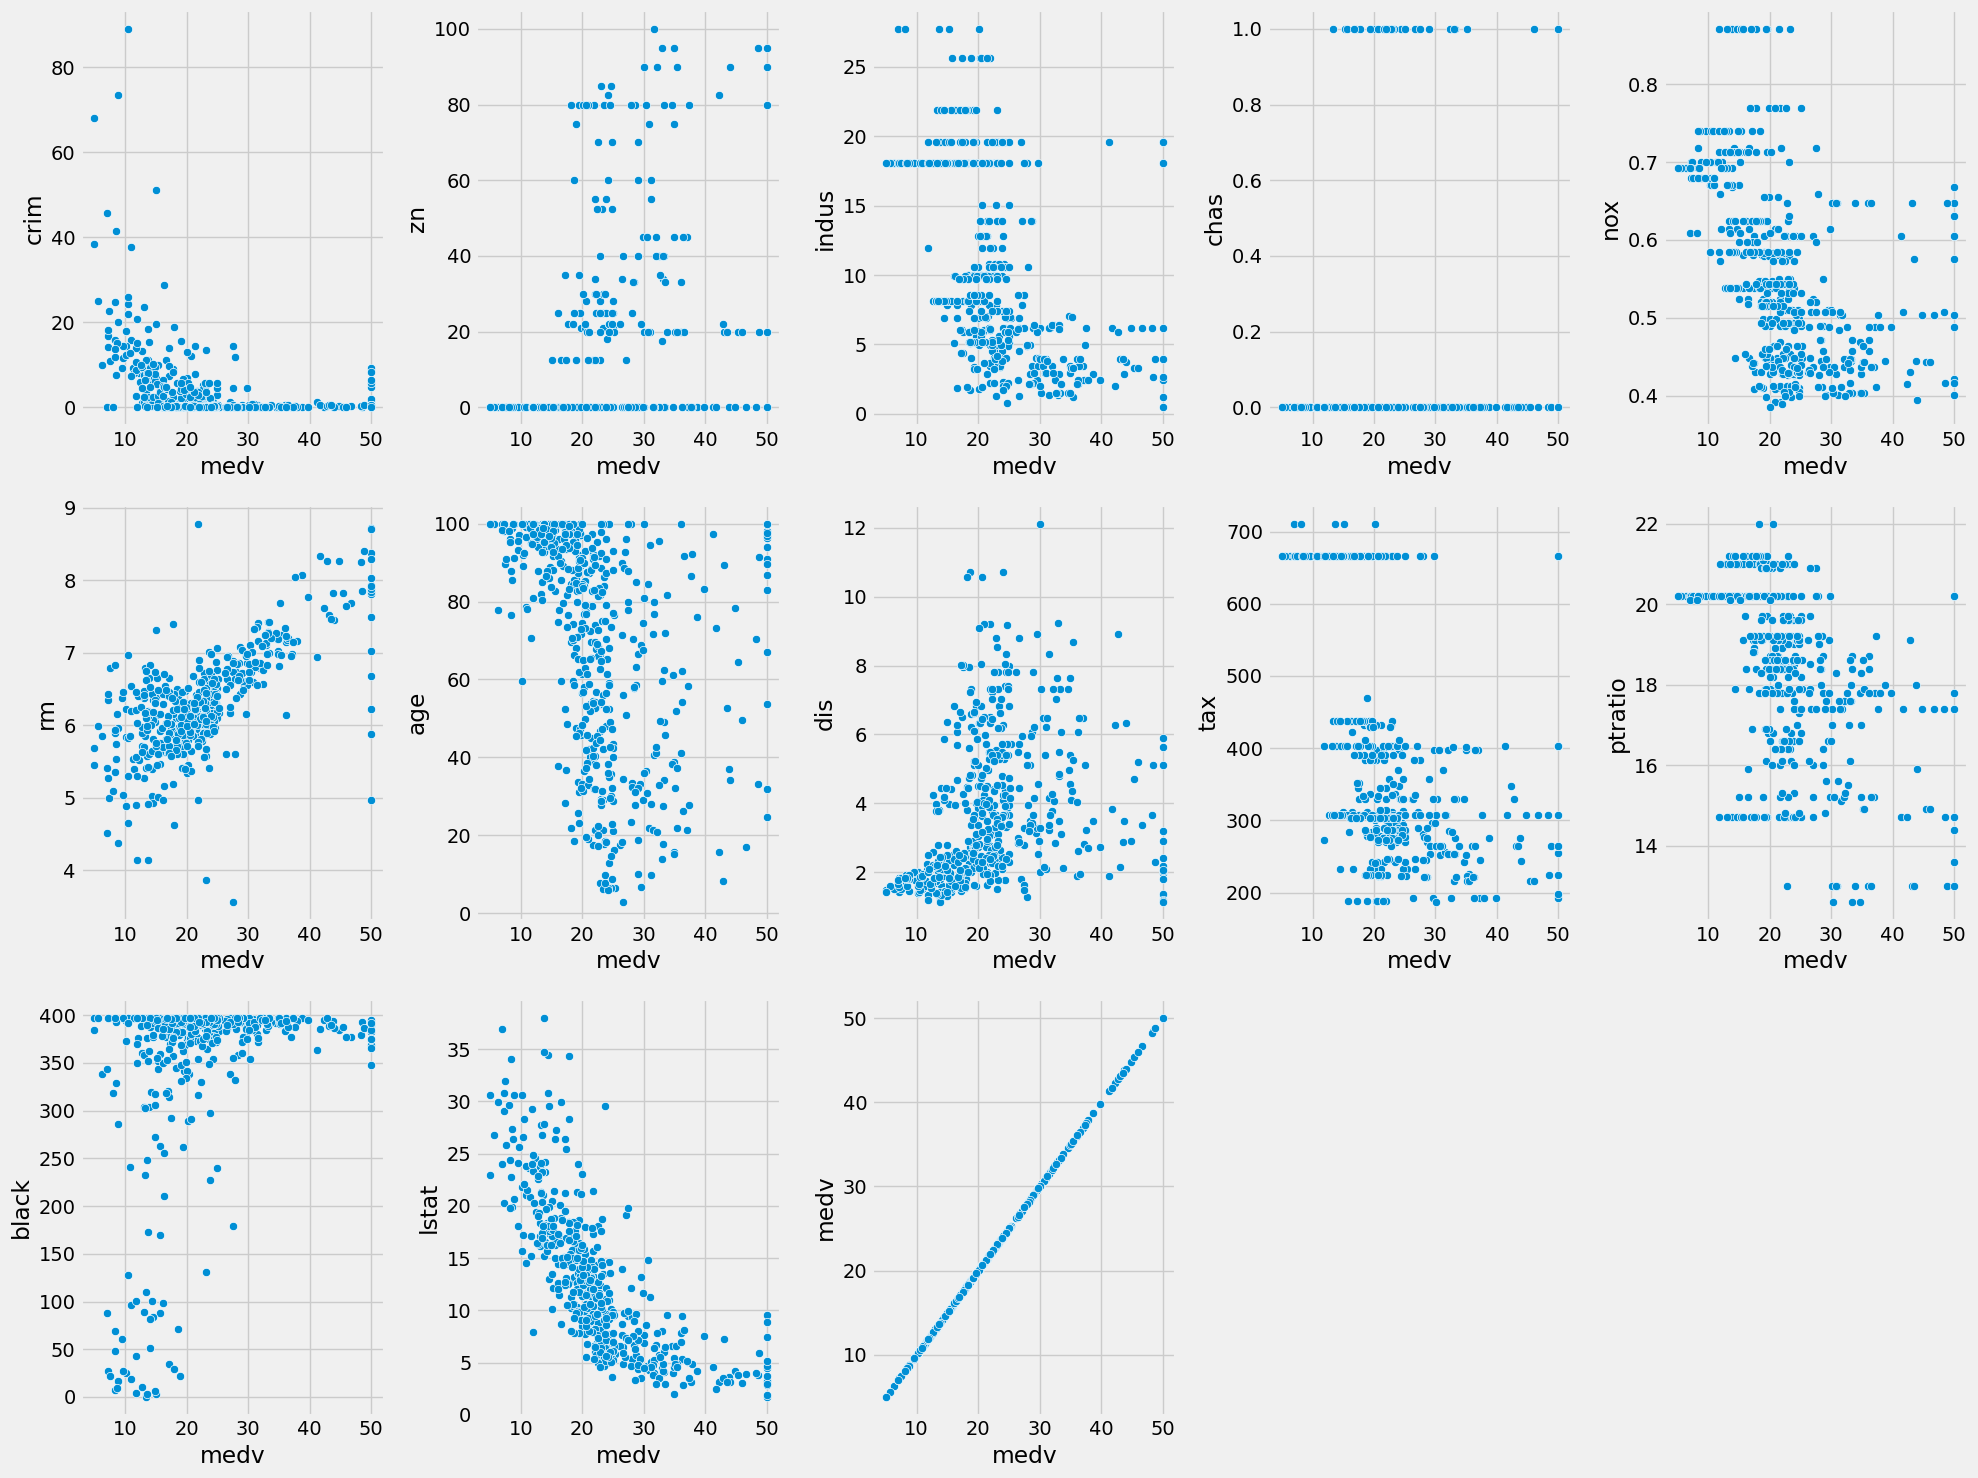

In [79]:
# Plotting `Price` with remaining columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = data['medv'], 
                        y = data[column])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

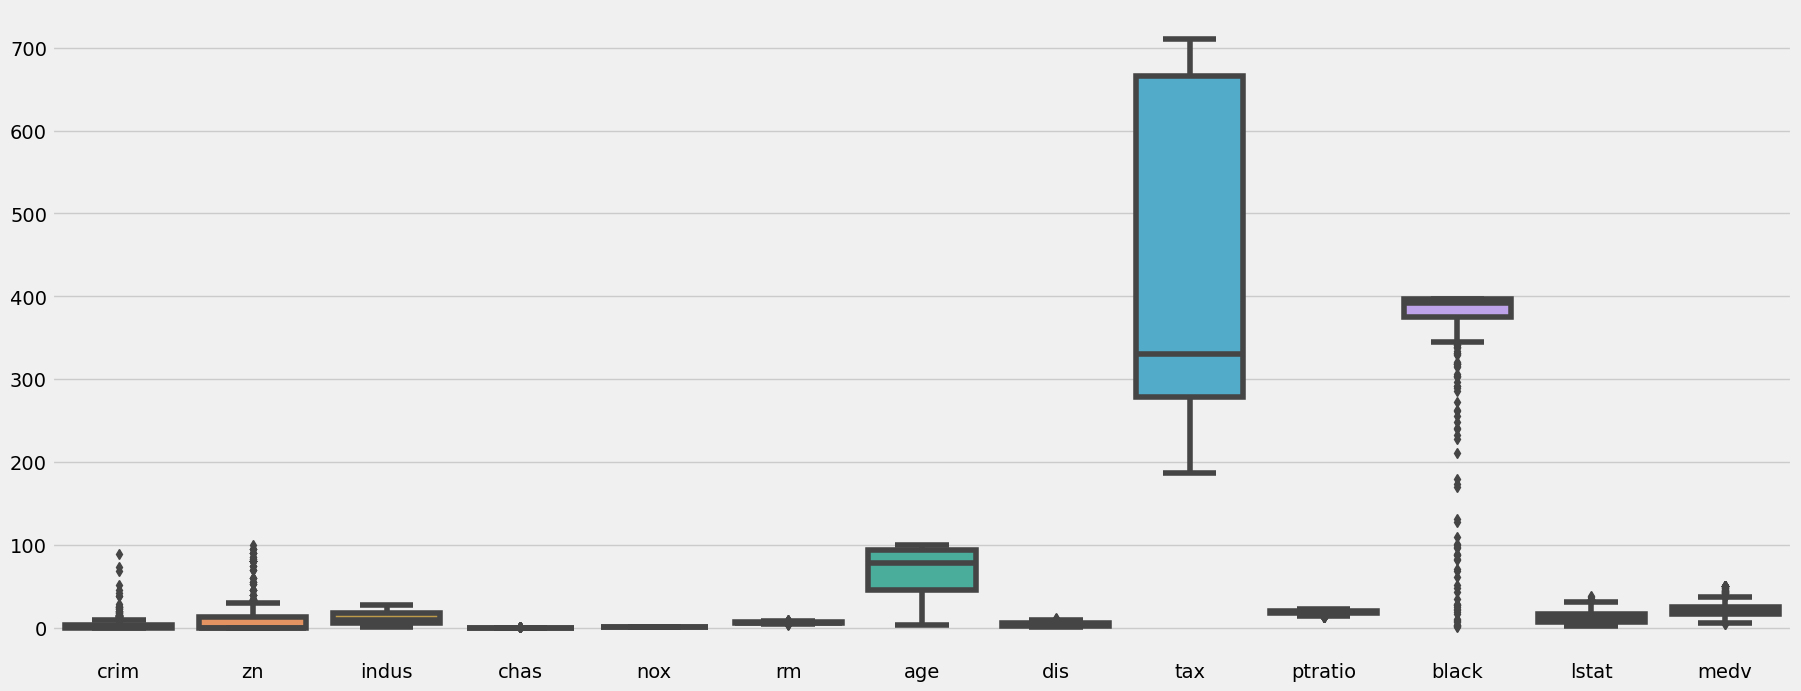

In [81]:
# looking for outliers using box plot

plt.figure(figsize = (20, 8))
sns.boxplot(data = data, width = 0.8)
plt.show()

### There are some outliers in data, so StandardScaler can help in scaling data

In [29]:
# creating features and label variable

X = data.drop(columns=["medv"])
y = data['medv']

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
X_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [32]:
# checking for multicollinearity using `VIF` 
# and `correlation matrix`

from statsmodels.stats.outliers_influence \
import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF']=[variance_inflation_factor(X_scaled, i)\
              for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

vif

,VIF,Features
0,1.792192,crim
1,2.298758,zn
2,3.991596,indus
3,1.073995,chas
4,4.393720,nox
5,1.933744,rm
6,3.100826,age
7,3.955945,dis
8,7.484496,rad
9,9.008554,tax


In [34]:
# dropping 'TAX' column from data

X.drop(columns = ['tax'])

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,black,lstat
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,21.0,391.99,9.67
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,21.0,396.90,9.08
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,21.0,396.90,5.64
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,21.0,393.45,6.48


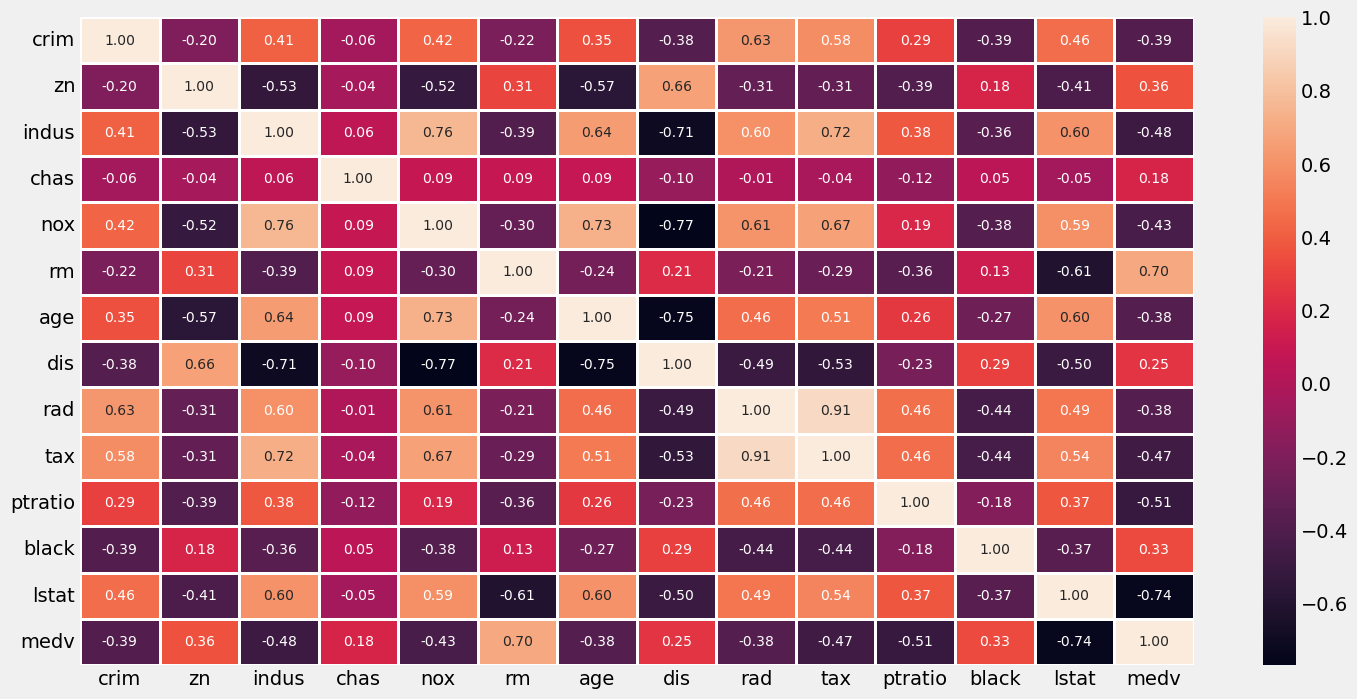

In [36]:
# Heatmap

fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(data.corr(), annot = True, 
            fmt = '1.2f', 
            annot_kws = {'size' : 10}, 
            linewidth = 1)
plt.show()

### "RAD" and "TAX" columns are highly correlated which means multicollinearity is present so we have to remove one column.

In [42]:
import statsmodels.formula.api as smf

lm = smf.ols(formula = 'medv ~ rad', data = data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     85.91
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           5.47e-19
Time:                        12:37:59   Log-Likelihood:                -1800.4
No. Observations:                 506   AIC:                             3605.
Df Residuals:                     504   BIC:                             3613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.3821      0.562     46.964      0.000      25.278      27.486
rad           -0.4031      0.043     -9.269      0.000      -0.489      -0.318
==============================================================================
Omnibus:                      149.634   Durbin-Watson:                   0.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              359.231
Skew:                           1.515   Prob(JB):                     9.86e-79
Kurtosis:                       5.803   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
lm = smf.ols(formula='MEDV ~ TAX', 
             data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           5.64e-29
Time:                        13:28:00   Log-Likelihood:                -1777.5
No. Observations:                 506   AIC:                             3559.
Df Residuals:                     504   BIC:                             3568.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.9707      0.948     34.768      0.000      31.108      34.834
TAX           -0.0256      0.002    -11.906      0.000      -0.030      -0.021
==============================================================================
Omnibus:                      172.501   Durbin-Watson:                   0.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.072
Skew:                           1.661   Prob(JB):                    5.17e-108
Kurtosis:                       6.521   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>From OLS Regression Results we can conclude that removing "RAD" column will be good.</strong></p> 

In [43]:
# removing "RAD" column

data.drop(columns = 'rad',inplace = True)

In [45]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2


In [46]:
# splitting data into training asnd test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X_scaled, y, 
                 test_size = 0.30, 
                 random_state = 0)

In [47]:
# fitting training data to model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
# prediction of model

y_pred = lr.predict(X_test)

In [49]:
# training accuracy of model

lr.score(X_train, y_train)

0.7645451026942549

In [50]:
# test accuracy of model

lr.score(X_test, y_test)

0.6733825506400195

In [51]:
# creating a function to create adhusted R-Squared

def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2

In [52]:
print(adj_r2(X_train, y_train, lr))

0.7555424154443293


In [53]:
print(adj_r2(X_test, y_test, lr))

0.6426142401930648


Model r2 score is less on the test data so there is chance of overfitting, let's check this using regularization.

<p style = "color : #f54748; font-size : 35px; font-family : 'Comic Sans MS';"><strong>Lasso Regression</strong></p>

In [55]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(alphas = None, cv = 10, 
        max_iter = 100000)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000)

In [56]:
# best alpha parameter

alpha = lasso_cv.alpha_
alpha

0.010305654624918545

In [57]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.010305654624918545)

In [58]:
lasso.score(X_train, y_train)

0.7644689900043997

In [59]:
lasso.score(X_test, y_test)

0.6723928734140832

In [60]:
print(adj_r2(X_train, y_train, lasso))

0.7554633925633915


In [61]:
print(adj_r2(X_test, y_test, lasso))

0.6415313325038157


<p style = "color : #f54748; font-size : 35px; font-family : 'Comic Sans MS';"><strong>Ridge Regression</strong></p>

In [63]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, 
            cv = 10)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([9.41086791, 8.47793777, 4.95566742, 0.30440406, 5.50939574,
       2.53035526, 7.44614911, 8.01643065, 5.6287638 , 2.11007954,
       4.225263  , 2.22567372, 5.22701679, 9.70604012, 3.83543824,
       0.28522876, 9.75119694, 1.98684467, 0.39320616, 8.07590159,
       4.19685045, 2.19874373, 2.51220352, 3.15496873, 9.55873425,
       2.11049794, 8.18714154, 8.46176863, 1.89829705, 9.07860023,
       7.55687718, 3.02654745, 2.195431  , 2.91926458, 5.27603049,
       9.73897271, 6.61121186, 0.72969331, 7.89500338, 3.87738603,
       1.03792554, 8.08299231, 6.54524431, 2.53469962, 5.0836391 ,
       2.86420616, 1.64578219, 9.22214223, 4.86897135, 3.0212331 ]),
        cv=10)

In [64]:
# best alpha parameter

alpha = ridge_cv.alpha_
alpha

9.751196940095598

In [65]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=9.751196940095598)

In [66]:
ridge.score(X_train, y_train)

0.7633462531303963

In [67]:
ridge.score(X_test, y_test)

0.6674816515624076

In [68]:
print(adj_r2(X_train, y_train, ridge))

0.7542977275147937


In [69]:
print(adj_r2(X_test, y_test, ridge))

0.6361574593182866


<p style = "color : #f54748; font-size : 35px; font-family : 'Comic Sans MS';"><strong>Elastic Net</strong></p>

In [71]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

elastic_net_cv = ElasticNetCV(alphas = None, 
                              cv = 10, 
                              max_iter = 100000)
elastic_net_cv.fit(X_train, y_train)

ElasticNetCV(cv=10, max_iter=100000)

In [72]:
# best alpha parameter

alpha = elastic_net_cv.alpha_
alpha

0.015591699580389263

In [73]:
# l1 ratio 

elastic_net_cv.l1_ratio

0.5

In [74]:
elastic_net = ElasticNet(alpha = elastic_net_cv.alpha_, l1_ratio = elastic_net_cv.l1_ratio)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.015591699580389263)

In [75]:
elastic_net.score(X_train, y_train)

0.7642714287976234

In [76]:
elastic_net.score(X_test, y_test)

0.6709719899541053

In [77]:
print(adj_r2(X_train, y_train, elastic_net))

0.7552582775457679


In [78]:
print(adj_r2(X_test, y_test, elastic_net))

0.6399765977034051


<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>We still are getting the same r2 score. That means our Regression model has been well trained over the training data and there is no overfitting.</strong></p> 